In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import fit
import hysteresis
import synthetic
import utils

In [2]:
def model(dataset_generator):
    n_grid = 50

    h_max = 0.25
    h_min = 0
    b_sat = 1.0

    # get synthetic training h_data
    h, m = dataset_generator(25, n_grid*2, b_sat)

    H = hysteresis.Hysteresis(h, h_min, h_max, b_sat, n_grid*2)

    # dummy predict
    m_pred = H.predict_magnetization().detach()

    fig, ax = plt.subplots()
    # ax.plot(h, m_pred)
    ax.plot(h, m.detach(), 'o')

    # optimize
    l = fit.train(H, m, 2000, .01)
    m_star = H.predict_magnetization().detach()

    ax.plot(h, m_star)
    
    print(l[-1])
    fig2, ax2 = plt.subplots()
    ax2.plot(l.detach())

    xx, yy = H.get_mesh()
    dens = H.get_density_matrix().detach()

    fig3, ax3 = plt.subplots()
    d_tri = ax3.pcolor(xx, yy, dens)
    fig3.colorbar(d_tri)

    states = H.get_states().detach()
    
    fig4, ax4 = plt.subplots()
    s_tri = ax4.pcolor(xx, yy, states)
    fig4.colorbar(s_tri)

    
if __name__ == 'model':
    main()
    plt.show()


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


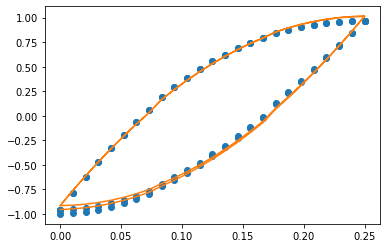

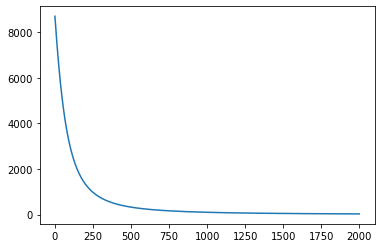

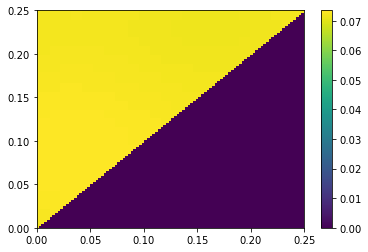

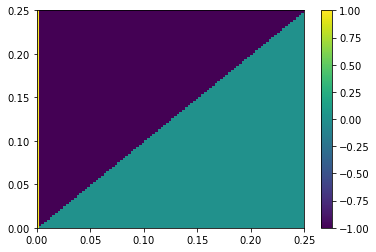

In [3]:
model(synthetic.generate_one_sided_dataset)

In [4]:
n_grid = 50

h_max = 0.25
h_min = 0
b_sat = 1.0

h, m = synthetic.generate_one_sided_dataset(25, n_grid*2, b_sat)

H = hysteresis.Hysteresis(h, h_min, h_max, b_sat, n_grid)
# fit.train(H, m, 2000)

dens = H.get_density_vector().detach()

print(dens)


tensor([1.3133, 1.3133, 1.3133,  ..., 1.3133, 1.3133, 1.3133],
       dtype=torch.float64)


In [5]:
if 0 in dens:
    print(True)
else:
    print(False)

False


In [6]:
d_tri=utils.vector_to_tril(dens, 100)

AssertionError: 